# 1 - Querying top miner UID

In [ ]:
import bittensor as bt

USE_TESTNET=False

if USE_TESTNET:
    metagraph = bt.metagraph(netuid=118, network="test")
else:
    metagraph = bt.metagraph(netuid=2, network="finney")

top_miner_uid = int(metagraph.incentive.argmax())
print(top_miner_uid)


# 2 - Demonstration of Rewards

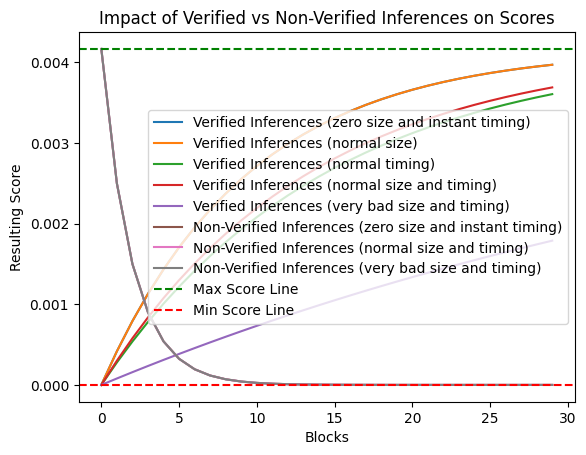

<Figure size 3000x1800 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
from _validator.reward import reward

try:
    import matplotlib
except ImportError:
    %pip install matplotlib

PLOT_BLOCKS = 30
MAX_SCORE = 1/240

# Define plotter
def plot_values(values, label, linestyle='-'):
    plt.plot([i for i in range(PLOT_BLOCKS)], values, label=label, linestyle=linestyle)

# Generate mock reward values
def generate_proven_values(initial_score, response, size=0, timing=0):
    values = [initial_score]
    for _ in range(PLOT_BLOCKS - 1):
        initial_score = reward(MAX_SCORE, initial_score, response, timing, size, 300 )
        values.append(initial_score)
    return values

# Generate and plot all the values
plot_values(generate_proven_values(0, True), 'Verified Inferences (zero size and instant timing)')
plot_values(generate_proven_values(0, True, 3648), 'Verified Inferences (normal size)')
plot_values(generate_proven_values(0, True, 0, 30), 'Verified Inferences (normal timing)')
plot_values(generate_proven_values(0, True, 3648, 20), 'Verified Inferences (normal size and timing)')
plot_values(generate_proven_values(0, True, 100000, 290), 'Verified Inferences (very bad size and timing)')
plot_values(generate_proven_values(MAX_SCORE, False), 'Non-Verified Inferences (zero size and instant timing)')
plot_values(generate_proven_values(MAX_SCORE, False, 21353, 20), 'Non-Verified Inferences (normal size and timing)')
plot_values(generate_proven_values(MAX_SCORE, False, 1000000, 300), 'Non-Verified Inferences (very bad size and timing)')

# Plotting configurations
plt.axhline(y=MAX_SCORE, color='g', linestyle='--', label='Max Score Line')
plt.axhline(y=0, color='r', linestyle='--', label='Min Score Line')
plt.xlabel('Blocks')
plt.ylabel('Resulting Score')
plt.title('Impact of Verified vs Non-Verified Inferences on Scores')
plt.legend()
plt.figure(figsize=(10, 6), dpi=300)
plt.show()


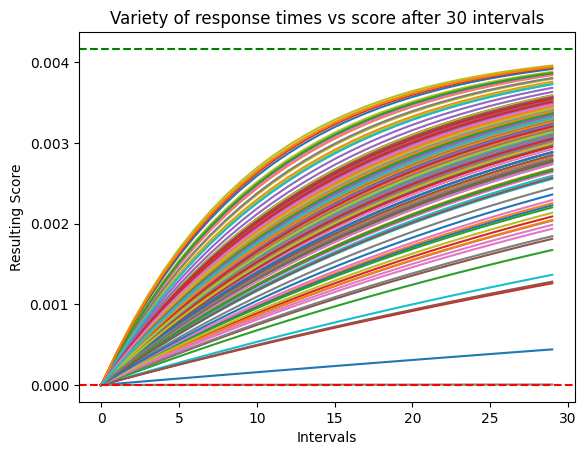

<Figure size 3000x1800 with 0 Axes>

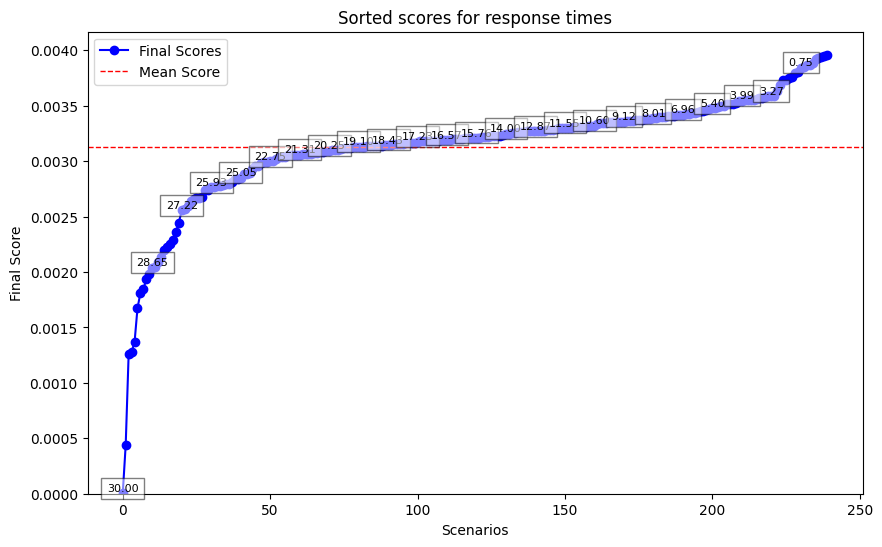

In [22]:

import random
import numpy as np
from _validator.reward import reward
import matplotlib.pyplot as plt

MAX_RESPONSE_TIME = 30
MIN_RESPONSE_TIME = 0
NUM_KEYS_TO_SIMULATE = 240

PLOT_BLOCKS = 30
MAX_SCORE = 1/NUM_KEYS_TO_SIMULATE

# Define plotter
def plot_values(values, label, linestyle='-'):
    plt.plot([i for i in range(PLOT_BLOCKS)], values, label=label, linestyle=linestyle)

def generate_proven_values(initial_score, response, size=0, timing=0):
    values = [initial_score]
    for _ in range(PLOT_BLOCKS - 1):
        initial_score = reward(MAX_SCORE, initial_score, response, timing, size, MAX_RESPONSE_TIME)
        values.append(initial_score)
    return values

random_response_times = [random.uniform(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME) for _ in range(NUM_KEYS_TO_SIMULATE)]

for i, response_time in enumerate(random_response_times):
    plot_values(generate_proven_values(0, True, 0, response_time), f'Miner {i+1}')

# Plotting configurations for the new chart
plt.axhline(y=1/NUM_KEYS_TO_SIMULATE, color='g', linestyle='--', label='Max Score Line')
plt.axhline(y=0, color='r', linestyle='--', label='Min Score Line')
plt.xlabel('Intervals')
plt.ylabel('Resulting Score')
plt.title(f'Variety of response times vs score after {PLOT_BLOCKS} intervals')
plt.figure(figsize=(10, 6), dpi=300)
plt.show()

final_scores_random = [generate_proven_values(0, True, 3648, rt)[-1] for rt in random_response_times]

# Sort both the times and the scores by the score
sorted_indices = np.argsort(final_scores_random)
sorted_final_scores_random = np.array(final_scores_random)[sorted_indices]
sorted_response_times = np.array(random_response_times)[sorted_indices]

# Plot scores and timings
plt.figure(figsize=(10, 6))
plt.plot(sorted_final_scores_random, color='blue', marker='o', linestyle='-', label='Final Scores')

# Show annotations above 1/10 of the points with the response time
for i, (score, response_time) in enumerate(zip(sorted_final_scores_random, sorted_response_times)):
    if i % 10 == 0:
        plt.text(i, score, f'{response_time:.2f}', fontsize=8, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.axhline(np.mean(sorted_final_scores_random), color='r', linestyle='dashed', linewidth=1, label='Mean Score')
plt.xlabel('Scenarios')
plt.ylim(0, MAX_SCORE)
plt.ylabel('Final Score')
plt.title("Sorted scores for response times")
plt.legend()
plt.show()


# 3 - N/A